## Import library

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
# load dataset
data = pd.read_csv("Regression.csv")
data = data.iloc[:, 2:]
# dealing with missing argument
data = data.dropna(how='any')
# 7590 remains
# separate features and target
X = data.drop(columns=['Next_Tmax', 'Next_Tmin'])
X = np.mat(X)
min_val = np.min(X,axis=0)
max_val = np.max(X,axis=0)
X = (X - min_val) / (max_val - min_val)

y = data[['Next_Tmax', 'Next_Tmin']]

## Set hyperparameters

In [3]:
# Set hyperparameters
epoch = 1000
random_seeds = [random.randint(1, 1000) for _ in range(10)]
lr_rate = 0.01
error_list = []

## Start training 10 times and ouput rmse as error

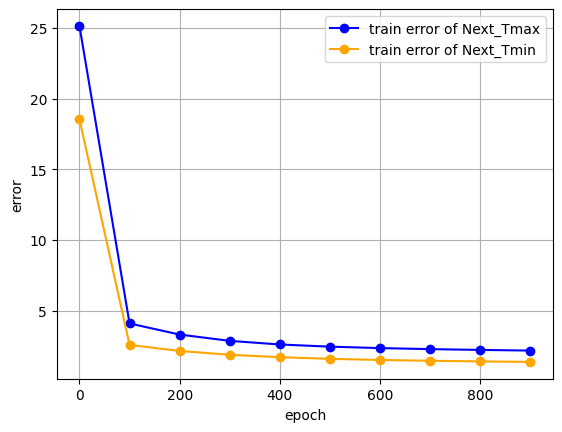

The test error for Next_Tmax is 2.0697672005425383,and the test error for Next_Tmin is 1.3120922106043353


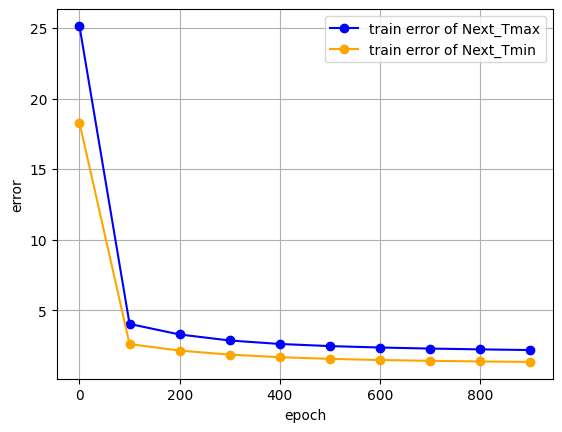

The test error for Next_Tmax is 2.1396879637239414,and the test error for Next_Tmin is 1.3172475057102007


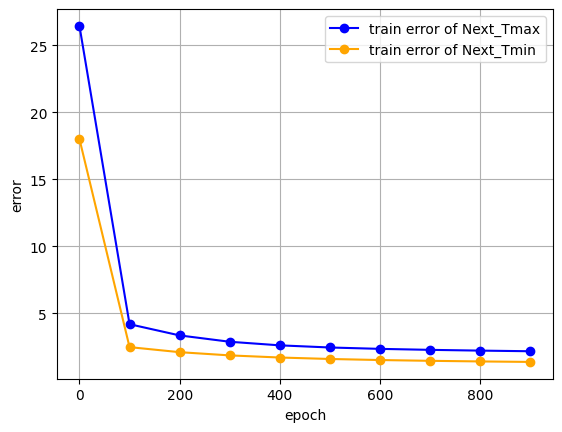

The test error for Next_Tmax is 2.1228149391024926,and the test error for Next_Tmin is 1.3286722251023686


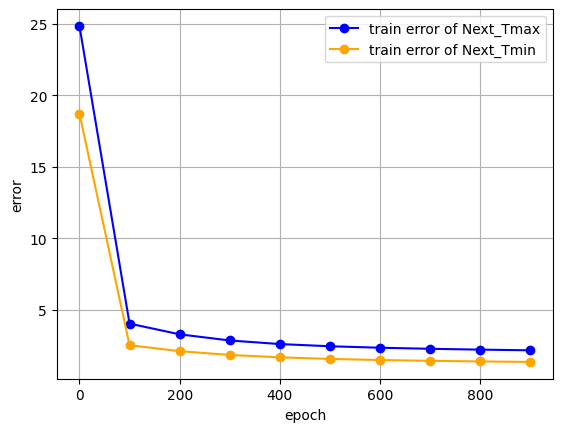

The test error for Next_Tmax is 2.1245971424846326,and the test error for Next_Tmin is 1.3245036565803618


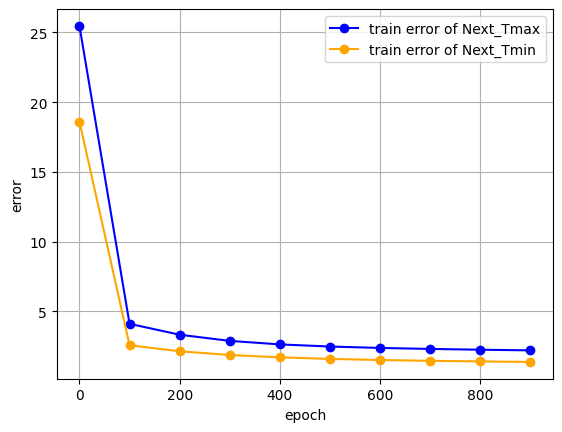

The test error for Next_Tmax is 2.174212248712102,and the test error for Next_Tmin is 1.323271165194611


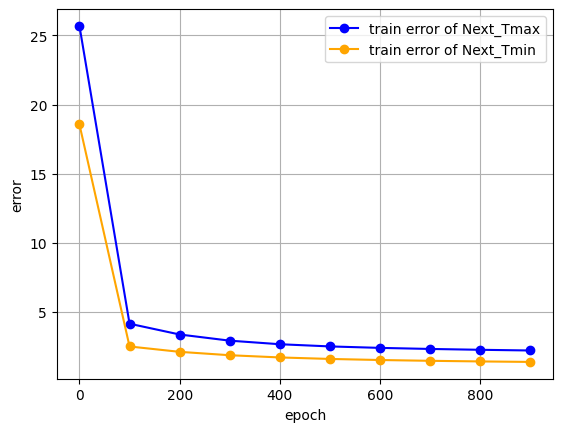

The test error for Next_Tmax is 2.2041754583594515,and the test error for Next_Tmin is 1.3706017676180131


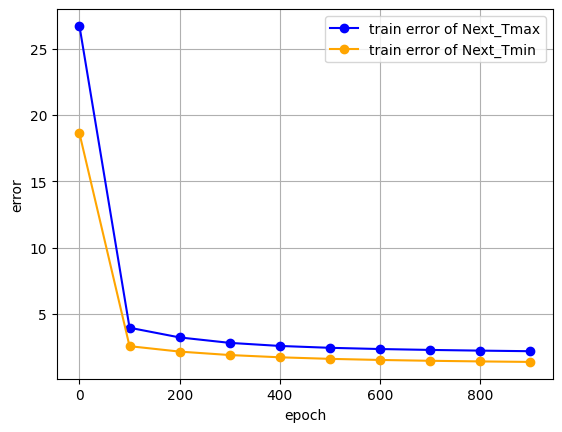

The test error for Next_Tmax is 2.1587812958534545,and the test error for Next_Tmin is 1.3526554148365677


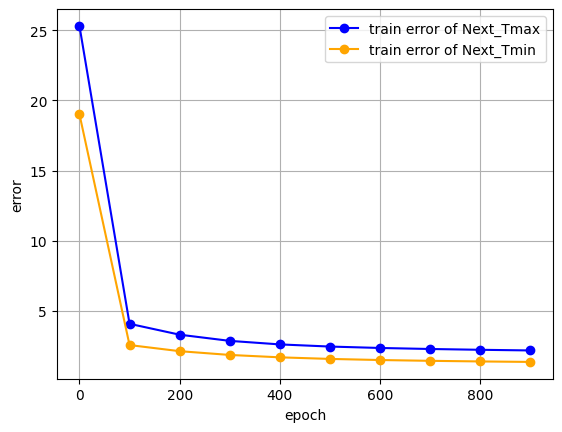

The test error for Next_Tmax is 2.0563217910853195,and the test error for Next_Tmin is 1.2917535686158421


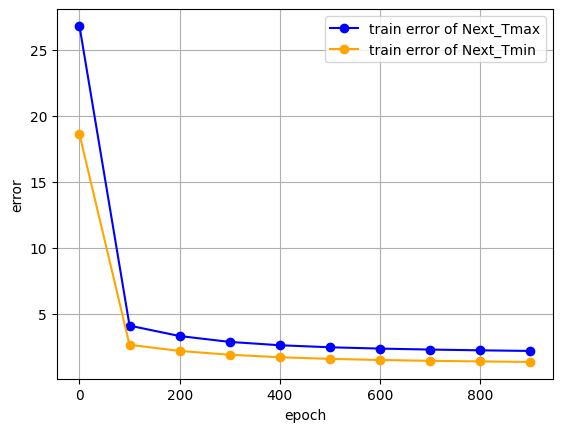

The test error for Next_Tmax is 2.109986545941039,and the test error for Next_Tmin is 1.3057403403613705


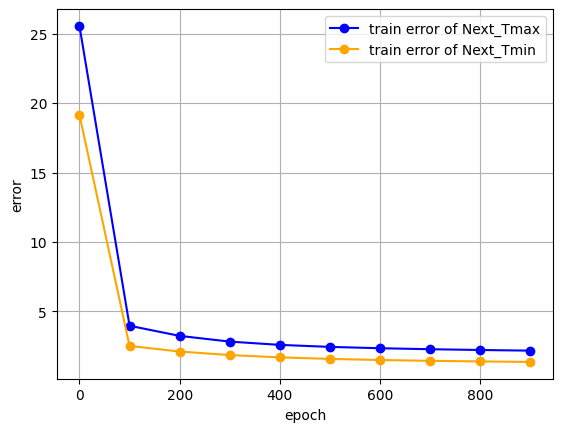

The test error for Next_Tmax is 2.1412503335421955,and the test error for Next_Tmin is 1.3369773945317602


In [4]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seeds[i])
    local_error_list = []
    # initialize weights with rand number
    weight = np.random.rand(21, 2)

    # initialize bias with rand number
    bias = np.random.rand(1, 2)

    X_train = np.mat(X_train)
    X_test = np.mat(X_test)
    y_train = np.mat(y_train)
    y_test = np.mat(y_test)
    # print(type(X_train))
    # print(X_train.shape)
    # print(X_train)
    # print(y_test)
    # print(y_train)


    for ep in range(epoch):
        pred = np.dot(X_train,weight)+bias
        train_error = np.sqrt((1/X_train.shape[0]) * np.sum(np.square(pred-y_train),axis = 0))
       
        gradient_w = (2/X_train.shape[0])*np.dot(X_train.transpose(),(pred-y_train))
       
        gradient_b = (2/X_train.shape[0])*np.sum((pred-y_train),axis = 0)

        weight -= gradient_w*lr_rate
        bias -= gradient_b*lr_rate

        if ep%100 == 0:
            local_error_list.append(np.squeeze(np.array(train_error)))
    
    x = [ i for i in range(0,epoch) if i%100 == 0]
    error1 = [i[0] for i in local_error_list]
    error2 = [i[1] for i in local_error_list]
    plt.plot(x, error1, label='train error of Next_Tmax', marker = 'o',color='blue',linestyle='-')
    plt.plot(x, error2, label='train error of Next_Tmin', marker = 'o',color='orange', linestyle='-')

    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()



    pred = np.dot(X_test,weight)+bias
    test_error = np.sqrt((1/X_test.shape[0]) * np.sum(np.square(pred-y_test),axis = 0))
    # print("test_error")
    # print(pred[:10])
    # print(y_test[:10])
    #print(test_error)
    print(f"The test error for Next_Tmax is {test_error[0,0]},and the test error for Next_Tmin is {test_error[0,1]}")

